In [270]:
import pandas as pd
import geopandas as gpd
import geopy
from geopandas.tools import geocode
import contextily as ctx
from geopy.geocoders import Nominatim
import shapely
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from geopandas import GeoDataFrame
from shapely.geometry import Polygon, Point
import pylab as pl
pd.set_option('display.max_columns', None)
from shapely import wkt


In [271]:
zri_raw = pd.read_csv('/Users/trevorban/Desktop/zri-data/Zip_ZORI_AllHomesPlusMultifamily_SSA.csv')
zri = zri_raw.copy()

In [272]:
city_zip = pd.read_csv('/Users/trevorban/Desktop/zri-data/complete/city_zip.csv').drop(columns='Unnamed: 0')
city_zip.head()

metro    zip
0  austin  78727
1  austin  78759
2  austin  78681
3  austin  78728
4  austin  78634

In [273]:
df = pd.read_csv('/Users/trevorban/Desktop/zri-data/complete/weather.csv').drop(columns='Unnamed: 0')

In [276]:
# getting all relevant zips from zri data
sub = df[df['date_time']=='2012-01-01']

In [6]:
geo_raw = geocode(sub['zip'], provider='nominatim', user_agent='autogis_xx', timeout=4)


In [234]:
# giant texas roads shapefile.  Will later on select only relevant coordinates to fill each city with roads.
highway_sf = gpd.read_file('/Users/trevorban/Downloads/texas_shapefile/texas_highway/texas_highway.shp')

<AxesSubplot:>

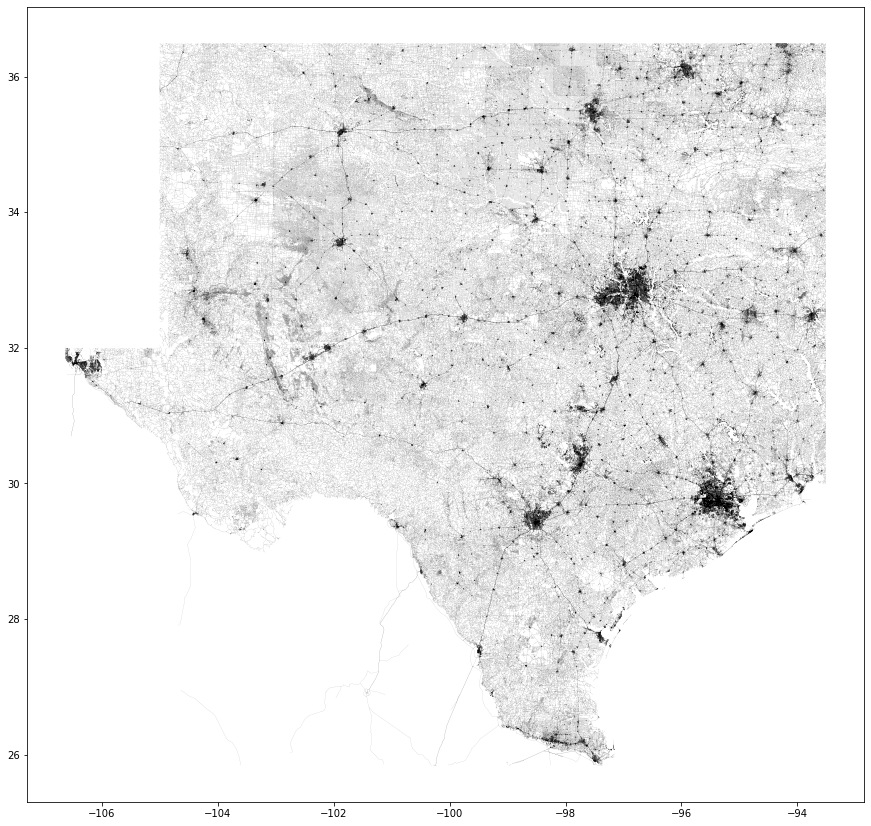

In [235]:
fig,ax = plt.subplots(figsize=(15,15))
highway_sf.plot(ax=ax, zorder=2, legend=True, color='black', linewidth=0.05)

In [236]:
# not many usable features.  I'll have to just pull coordinates from geometry in order to select which to use.  
highway_sf.head()

TYPE             NAME ONEWAY  \
0    secondary        McNutt Rd   None   
1  residential             None   None   
2  residential     Man O War St   None   
3  residential  Country Club Rd   None   
4  residential      Crawford Rd   None   

                                            geometry  
0  LINESTRING (-106.54289 31.80148, -106.54433 31...  
1  LINESTRING (-106.63227 31.98552, -106.63193 31...  
2  LINESTRING (-106.63225 31.90800, -106.63129 31...  
3  LINESTRING (-106.63216 31.84619, -106.62635 31...  
4  LINESTRING (-106.62104 31.84665, -106.62128 31...

In [11]:
# load the roads for each metro
sanan = gpd.read_file('/Users/trevorban/Downloads/texas_shapefile/sanan/shape/roads.shp')
dfw = gpd.read_file('/Users/trevorban/Downloads/texas_shapefile/dfw/shape/roads.shp')
houston = gpd.read_file('/Users/trevorban/Downloads/texas_shapefile/houston/shape/roads.shp')
austin = gpd.read_file('/Users/trevorban/Downloads/texas_shapefile/austin/shape/roads.shp')
elpaso = gpd.read_file('/Users/trevorban/Downloads/texas_shapefile/elpaso/shape/roads.shp')


In [12]:
sanan_water = gpd.read_file('/Users/trevorban/Downloads/texas_shapefile/sanan/shape/waterways.shp')
dfw_water = gpd.read_file('/Users/trevorban/Downloads/texas_shapefile/dfw/shape/waterways.shp')
houston_water = gpd.read_file('/Users/trevorban/Downloads/texas_shapefile/houston/shape/waterways.shp')
austin_water = gpd.read_file('/Users/trevorban/Downloads/texas_shapefile/austin/shape/waterways.shp')
elpaso_water = gpd.read_file('/Users/trevorban/Downloads/texas_shapefile/elpaso/shape/waterways.shp')


In [13]:
sanan_nat = gpd.read_file('/Users/trevorban/Downloads/texas_shapefile/sanan/shape/natural.shp')
dfw_nat = gpd.read_file('/Users/trevorban/Downloads/texas_shapefile/dfw/shape/natural.shp')
houston_nat = gpd.read_file('/Users/trevorban/Downloads/texas_shapefile/houston/shape/natural.shp')
austin_nat = gpd.read_file('/Users/trevorban/Downloads/texas_shapefile/austin/shape/natural.shp')
elpaso_nat = gpd.read_file('/Users/trevorban/Downloads/texas_shapefile/elpaso/shape/natural.shp')


In [15]:
sanan_nat_water = sanan_nat[sanan_nat['type']=='water']
dfw_nat_water = dfw_nat[dfw_nat['type']=='water']
houston_nat_water = houston_nat[houston_nat['type']=='water']
austin_nat_water = austin_nat[austin_nat['type']=='water']
elpaso_nat_water = elpaso_nat[elpaso_nat['type']=='water']

In [21]:
# https://gis.dallascityhall.com/shapezip.htm
# dallas

dfw = gpd.read_file('/Users/trevorban/Downloads/texas_shapefile/dfw3/STREETS.shp')

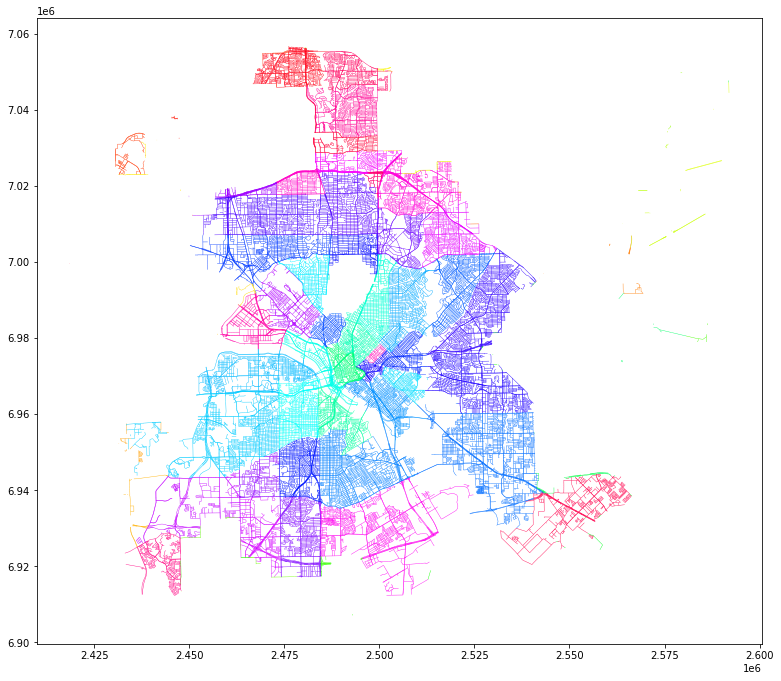

In [266]:
fig,ax = plt.subplots(figsize=(13,13))
dfw.plot(ax=ax, zorder=2, legend=False, column='POSTAL_L', linewidth=.4, cmap='hsv')
ax.grid(False)

<AxesSubplot:>

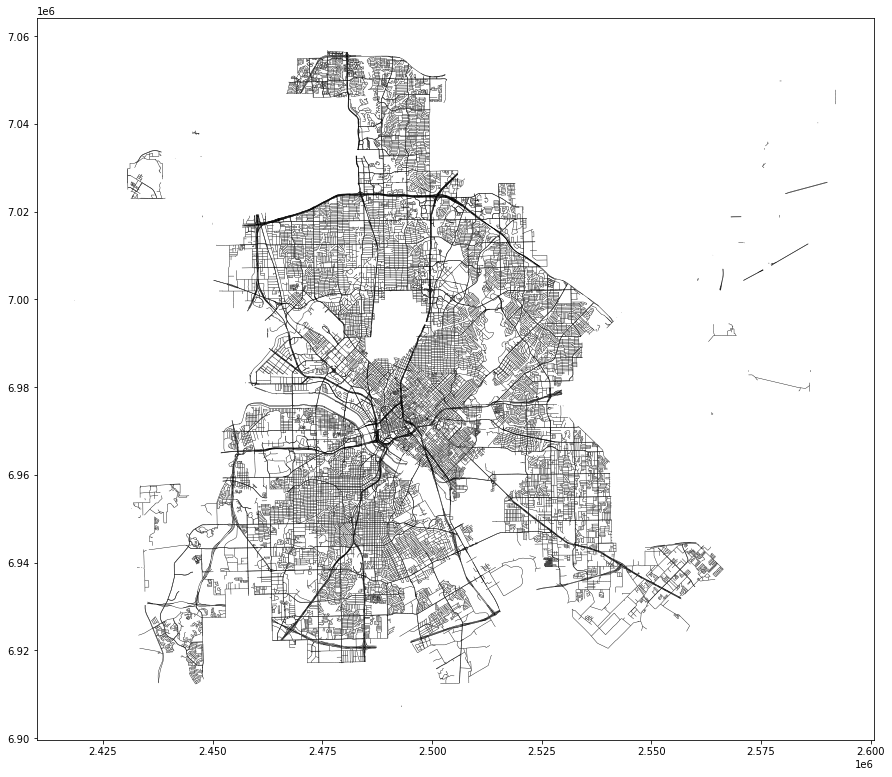

In [25]:
fig,ax = plt.subplots(figsize=(15,15))
dfw.plot(ax=ax, zorder=2, legend=True, color='black', linewidth=.4)

<AxesSubplot:>

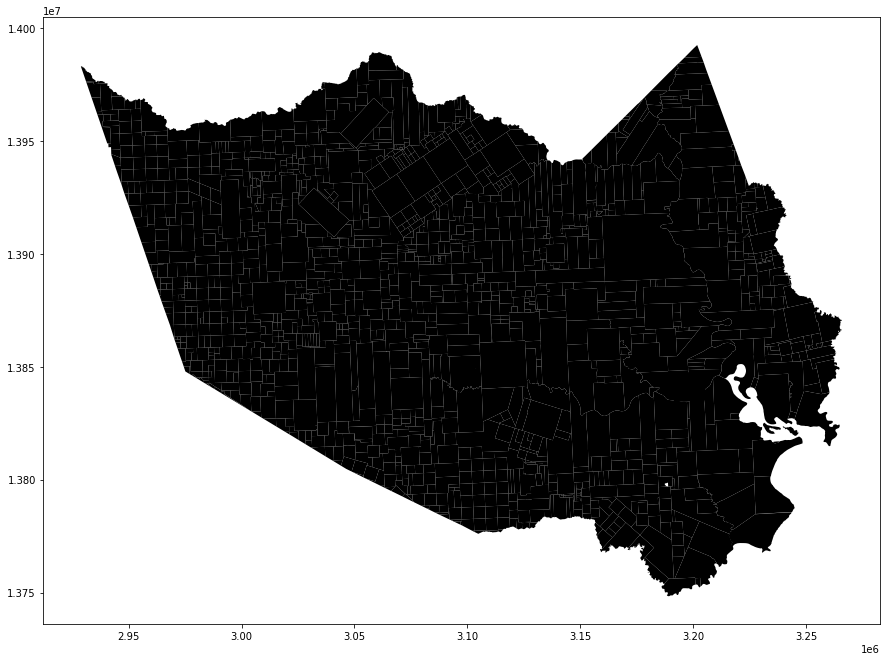

In [26]:
test = gpd.read_file('/Users/trevorban/Downloads/texas_shapefile/untitled folder/Abstract/Abstract.shp')
fig,ax = plt.subplots(figsize=(15,15))
test.plot(ax=ax, zorder=2, legend=True, color='black', linewidth=.4)

In [31]:
# https://regional-open-data-capcog.opendata.arcgis.com/
test = gpd.read_file('/Users/trevorban/Downloads/texas_shapefile/houston_test/zipcode/ZIPCODE.shp')

In [32]:
len(test.ZIPCODE.unique())

417

<AxesSubplot:>

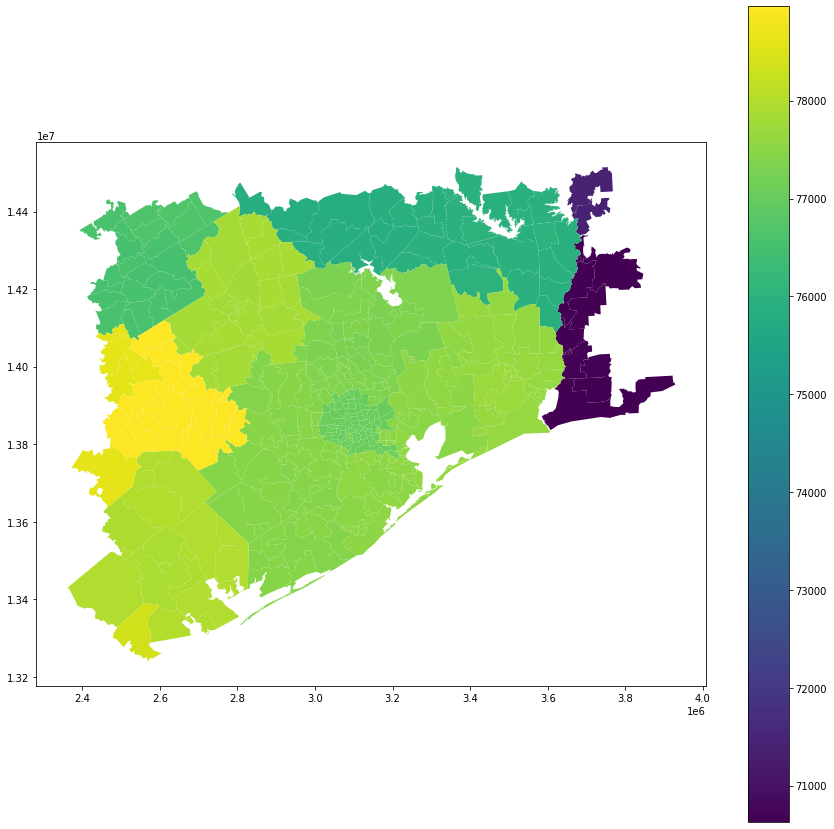

In [33]:
fig,ax = plt.subplots(figsize=(15,15))
test.plot(ax=ax, zorder=2, legend=True, linewidth=.4, column='ZIPCODE')

In [34]:
#houst = city_zip[city_zip['metro']=='houston']['zip']

In [35]:
houst = test[test['PO_NAME'] == 'Houston']
len(houst['ZIPCODE'].unique())

96

In [36]:
# houst['ZIPCODE'] = houst['ZIPCODE'].astype(str)

In [37]:
houst

PO_NAME  ZIPCODE    Shape_area      Shape_len  \
69   Houston    77002  5.796564e+07   68755.092044   
70   Houston    77003  7.754224e+07   64056.067816   
71   Houston    77004  1.550851e+08   57907.269908   
72   Houston    77005  9.381332e+07   51645.248280   
73   Houston    77006  6.354817e+07   40046.055623   
..       ...      ...           ...            ...   
160  Houston    77094  5.320489e+08  100182.574283   
161  Houston    77095  4.154612e+08   81061.275977   
162  Houston    77096  1.708840e+08   60668.472582   
163  Houston    77098  4.978770e+07   30349.469444   
164  Houston    77099  1.776816e+08   74701.301079   

                                              geometry  
69   POLYGON ((3123008.128 13839048.617, 3122829.71...  
70   POLYGON ((3123008.128 13839048.617, 3123218.17...  
71   POLYGON ((3129222.118 13831771.680, 3130684.91...  
72   POLYGON ((3113881.528 13828428.835, 3112938.18...  
73   POLYGON ((3110258.954 13828956.742, 3110232.73...  
..                                                 ...  
160  POLYGON ((3032450.919 13830250.095, 3030011.05...  
161  POLYGON ((3037865.816 13882721.959, 3036760.49...  
162  POLYGON ((3096673.721 13809478.893, 3095523.31...  
163  POLYGON ((3101906.377 13830375.576, 3101722.19...  
164  POLYGON ((3060430.732 13802998.734, 3059973.35...  

[96 rows x 5 columns]

<AxesSubplot:>

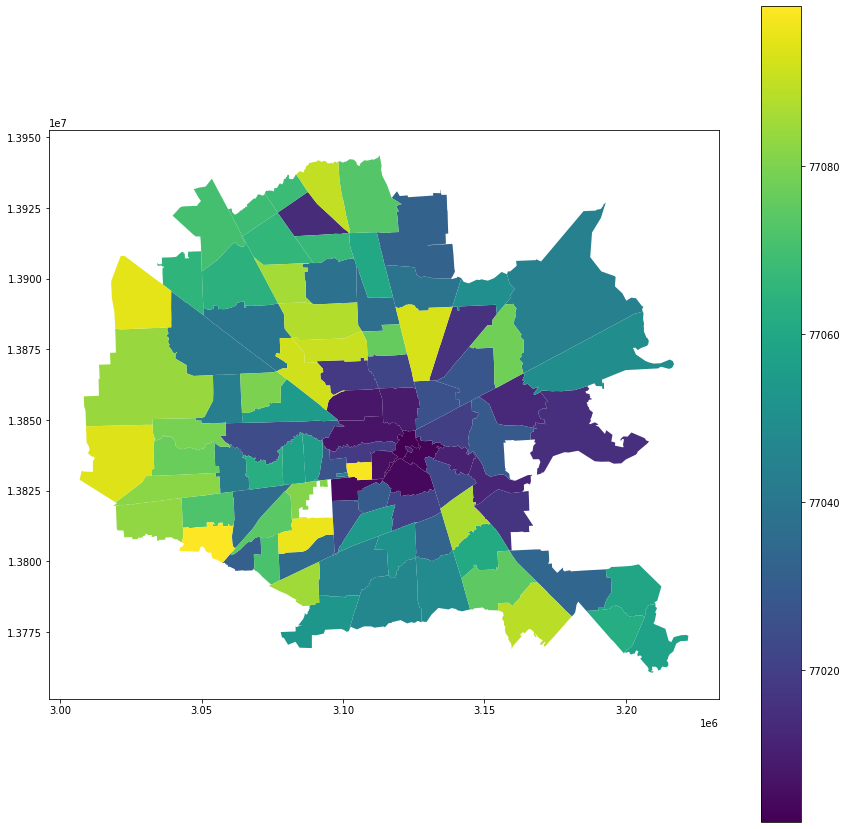

In [38]:
fig,ax = plt.subplots(figsize=(15,15))
houst.plot(ax=ax, zorder=2, legend=True, linewidth=.4, column='ZIPCODE')

In [39]:
sub = test[test['ZIPCODE'].isin(city_zip['zip'])]

In [40]:
test['ZIPCODE'] = test['ZIPCODE'].astype(str)

In [41]:
zips = gpd.read_file('/Users/trevorban/Downloads/tl_2019_us_zcta510/tl_2019_us_zcta510.shp')

In [42]:
zips

ZCTA5CE10 GEOID10 CLASSFP10 MTFCC10 FUNCSTAT10    ALAND10  AWATER10  \
0         43451   43451        B5   G6350          S   63484186    157689   
1         43452   43452        B5   G6350          S  121522304  13721730   
2         43456   43456        B5   G6350          S    9320975   1003775   
3         43457   43457        B5   G6350          S   48004681         0   
4         43458   43458        B5   G6350          S    2573816     39915   
...         ...     ...       ...     ...        ...        ...       ...   
33139     84044   84044        B5   G6350          S  123283611  69912363   
33140     84045   84045        B5   G6350          S   52780589    105248   
33141     84046   84046        B5   G6350          S  333205012   4460752   
33142     84047   84047        B5   G6350          S   16172461         0   
33143     84049   84049        B5   G6350          S  215986423  10468874   

        INTPTLAT10    INTPTLON10  \
0      +41.3183010  -083.6174935   
1      +41.5157923  -082.9809454   
2      +41.6318300  -082.8393923   
3      +41.2673301  -083.4274872   
4      +41.5304461  -083.2133648   
...            ...           ...   
33139  +40.7201095  -112.1549645   
33140  +40.3364908  -111.9111905   
33141  +40.9207693  -109.8310453   
33142  +40.6152301  -111.8907499   
33143  +40.5228727  -111.5243678   

                                                geometry  
0      POLYGON ((-83.70873 41.32733, -83.70815 41.327...  
1      POLYGON ((-83.08698 41.53780, -83.08256 41.537...  
2      MULTIPOLYGON (((-82.83558 41.71082, -82.83515 ...  
3      POLYGON ((-83.49650 41.25371, -83.48382 41.253...  
4      POLYGON ((-83.22229 41.53102, -83.22228 41.532...  
...                                                  ...  
33139  POLYGON ((-112.26022 40.76909, -112.25333 40.7...  
33140  MULTIPOLYGON (((-111.92421 40.17034, -111.9240...  
33141  POLYGON ((-110.00072 40.99745, -110.00036 40.9...  
33142  POLYGON ((-111.92141 40.62772, -111.92134 40.6...  
33143  POLYGON ((-111.59394 40.57707, -111.59386 40.5...  

[33144 rows x 10 columns]

In [43]:
# # https://data.houstontx.gov/dataset/zip-codes-in-the-region/resource/bb634e26-cb64-44e4-8b86-3a37d113886b
# fig,ax = plt.subplots(figsize=(15,15))
# zips.plot(ax=ax, zorder=2, legend=True, linewidth=.4)

In [44]:
zippers = list(city_zip['zip'])

In [83]:
zips['GEOID10'] = zips['GEOID10'].astype(int)

In [84]:
zipz = zips[zips['GEOID10'].isin(zippers)]

In [85]:
city_zip

metro    zip
0         austin  78727
1         austin  78759
2         austin  78681
3         austin  78728
4         austin  78634
..           ...    ...
210  san_antonio  78259
211  san_antonio  78239
212  san_antonio  78244
213  san_antonio  78247
214  san_antonio  78252

[215 rows x 2 columns]

In [86]:
zipz['GEOID10'] = zipz['GEOID10'].astype(int)

/Users/trevorban/opt/anaconda3/lib/python3.7/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


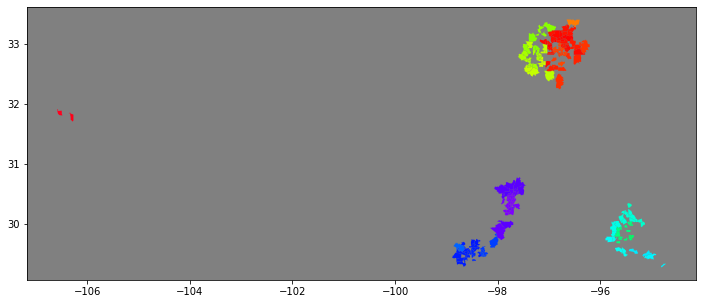

In [87]:
fig,ax = plt.subplots(figsize=(12,12))
zipz.plot(ax=ax, zorder=2, legend=False, column = 'GEOID10', linewidth=.4, cmap='hsv')
ax.set(facecolor = "gray")
ax.grid(False)

In [68]:
city_zip_noel = city_zip[city_zip['metro'] != 'el_paso']

In [69]:
# https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.2017.html
cart = gpd.read_file('/Users/trevorban/Downloads/texas_shapefile/cb_2017_us_zcta510_500k/cb_2017_us_zcta510_500k.shp')

In [70]:
cart

ZCTA5CE10      AFFGEOID10 GEOID10     ALAND10  AWATER10  \
0         35442  8600000US35442   35442   610213891  10838694   
1         85365  8600000US85365   85365  3545016067   9766486   
2         71973  8600000US71973   71973   204670474   1264709   
3         95445  8600000US95445   95445   221559097   7363179   
4         06870  8600000US06870   06870     5945321   3841130   
...         ...             ...     ...         ...       ...   
33139     50565  8600000US50565   50565   113882986    121159   
33140     20566  8600000US20566   20566      105615         0   
33141     08562  8600000US08562   08562    44539346    272039   
33142     08069  8600000US08069   08069    43687925   2148989   
33143     88349  8600000US88349   88349    78507557      7555   

                                                geometry  
0      MULTIPOLYGON (((-88.25262 32.92675, -88.24972 ...  
1      MULTIPOLYGON (((-114.68466 32.68739, -114.6760...  
2      POLYGON ((-94.46643 34.33073, -94.46638 34.332...  
3      POLYGON ((-123.64305 38.85123, -123.64140 38.8...  
4      POLYGON ((-73.58766 41.00765, -73.57197 41.017...  
...                                                  ...  
33139  POLYGON ((-95.09264 42.82368, -95.09230 42.829...  
33140  POLYGON ((-77.05650 38.89767, -77.05362 38.897...  
33141  POLYGON ((-74.66573 40.03401, -74.65859 40.036...  
33142  POLYGON ((-75.50341 39.69856, -75.49624 39.701...  
33143  POLYGON ((-105.83245 32.78207, -105.83042 32.7...  

[33144 rows x 6 columns]

In [71]:
# fig,ax = plt.subplots(figsize=(12,12))
# cart.plot(ax=ax, zorder=2, legend=False, column = 'GEOID10', cmap='hsv')
# ax.set(facecolor = "gray")
# ax.grid(False)

In [72]:
# https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.2017.html
# by county
testing = gpd.read_file('/Users/trevorban/Downloads/cb_2017_48_cousub_500k/cb_2017_48_cousub_500k.shp')

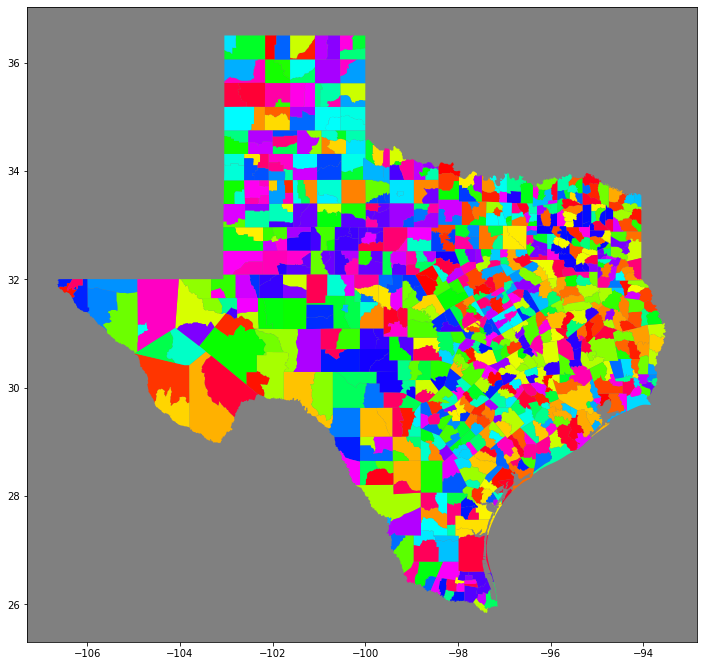

In [73]:
fig,ax = plt.subplots(figsize=(12,12))
testing.plot(ax=ax, zorder=2, legend=False, cmap='hsv')
ax.set(facecolor = "gray")
ax.grid(False)

In [74]:
# https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.2017.html
# by census tract
test = gpd.read_file('/Users/trevorban/Downloads/cb_2017_48_tract_500k/cb_2017_48_tract_500k.shp')


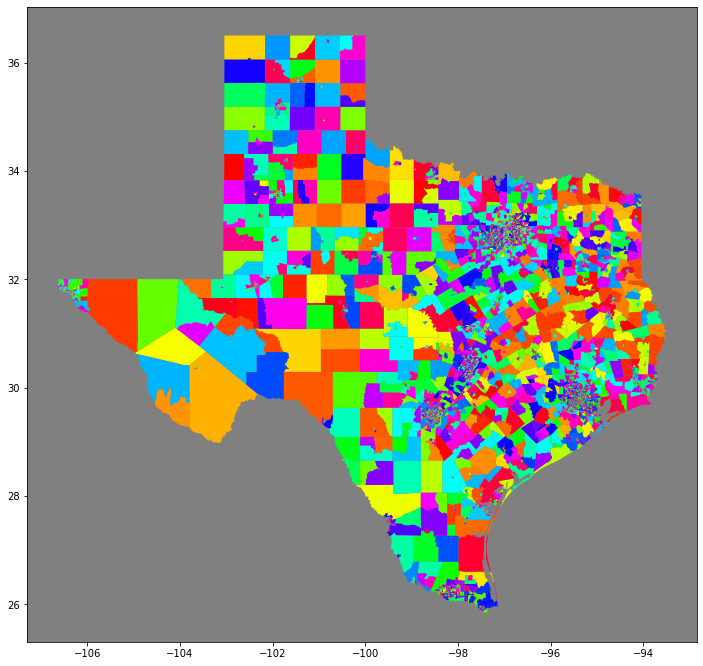

In [75]:
fig,ax = plt.subplots(figsize=(12,12))
test.plot(ax=ax, zorder=2, legend=False, cmap='hsv')
ax.set(facecolor = "gray")
ax.grid(False)

In [76]:
test

STATEFP COUNTYFP TRACTCE              AFFGEOID        GEOID     NAME  \
0         48      001  950902  1400000US48001950902  48001950902  9509.02   
1         48      005  000200  1400000US48005000200  48005000200        2   
2         48      005  000700  1400000US48005000700  48005000700        7   
3         48      005  001200  1400000US48005001200  48005001200       12   
4         48      009  020200  1400000US48009020200  48009020200      202   
...      ...      ...     ...                   ...          ...      ...   
5249      48      215  020724  1400000US48215020724  48215020724   207.24   
5250      48      029  181715  1400000US48029181715  48029181715  1817.15   
5251      48      135  001700  1400000US48135001700  48135001700       17   
5252      48      029  121804  1400000US48029121804  48029121804  1218.04   
5253      48      113  013626  1400000US48113013626  48113013626   136.26   

     LSAD       ALAND    AWATER  \
0      CT   441365958   4947660   
1      CT   125709530   4356605   
2      CT     2876878         0   
3      CT   399114984  98858732   
4      CT  1318291865  40681909   
...   ...         ...       ...   
5249   CT     3311690         0   
5250   CT     1932125         0   
5251   CT     3658423         0   
5252   CT     2370258     42599   
5253   CT      702412         0   

                                               geometry  
0     POLYGON ((-95.70501 31.84081, -95.70560 31.843...  
1     POLYGON ((-94.73299 31.38508, -94.73146 31.395...  
2     POLYGON ((-94.73497 31.32790, -94.73220 31.334...  
3     POLYGON ((-94.52617 31.21277, -94.50539 31.216...  
4     POLYGON ((-98.95382 33.49637, -98.95377 33.531...  
...                                                 ...  
5249  POLYGON ((-98.27784 26.20992, -98.27561 26.223...  
5250  POLYGON ((-98.69199 29.49499, -98.69172 29.496...  
5251  POLYGON ((-102.34731 31.87560, -102.34343 31.8...  
5252  POLYGON ((-98.38481 29.56837, -98.38342 29.569...  
5253  POLYGON ((-96.82209 32.93950, -96.81793 32.939...  

[5254 rows x 10 columns]

In [88]:
# https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.2017.html
zip_map = gpd.read_file('/Users/trevorban/Downloads/cb_2017_us_zcta510_500k (1)/cb_2017_us_zcta510_500k.shp')



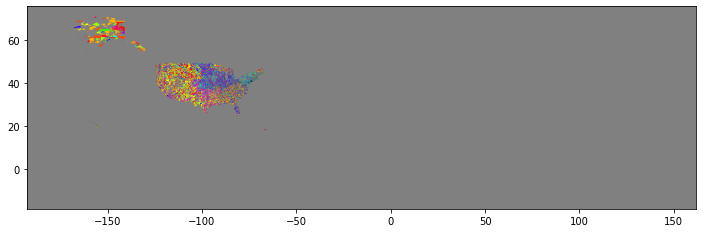

In [89]:
fig,ax = plt.subplots(figsize=(12,12))
zip_map.plot(ax=ax, zorder=2, legend=False, cmap='hsv')
ax.set(facecolor = "gray")
ax.grid(False)

In [90]:
zip_map

ZCTA5CE10      AFFGEOID10 GEOID10     ALAND10  AWATER10  \
0         35442  8600000US35442   35442   610213891  10838694   
1         85365  8600000US85365   85365  3545016067   9766486   
2         71973  8600000US71973   71973   204670474   1264709   
3         95445  8600000US95445   95445   221559097   7363179   
4         06870  8600000US06870   06870     5945321   3841130   
...         ...             ...     ...         ...       ...   
33139     50565  8600000US50565   50565   113882986    121159   
33140     20566  8600000US20566   20566      105615         0   
33141     08562  8600000US08562   08562    44539346    272039   
33142     08069  8600000US08069   08069    43687925   2148989   
33143     88349  8600000US88349   88349    78507557      7555   

                                                geometry  
0      MULTIPOLYGON (((-88.25262 32.92675, -88.24972 ...  
1      MULTIPOLYGON (((-114.68466 32.68739, -114.6760...  
2      POLYGON ((-94.46643 34.33073, -94.46638 34.332...  
3      POLYGON ((-123.64305 38.85123, -123.64140 38.8...  
4      POLYGON ((-73.58766 41.00765, -73.57197 41.017...  
...                                                  ...  
33139  POLYGON ((-95.09264 42.82368, -95.09230 42.829...  
33140  POLYGON ((-77.05650 38.89767, -77.05362 38.897...  
33141  POLYGON ((-74.66573 40.03401, -74.65859 40.036...  
33142  POLYGON ((-75.50341 39.69856, -75.49624 39.701...  
33143  POLYGON ((-105.83245 32.78207, -105.83042 32.7...  

[33144 rows x 6 columns]

In [91]:
zip_map['GEOID10'] = zip_map['GEOID10'].astype(int)

In [92]:
zipz = zipz[zipz['GEOID10'].isin(city_zip['zip'])]

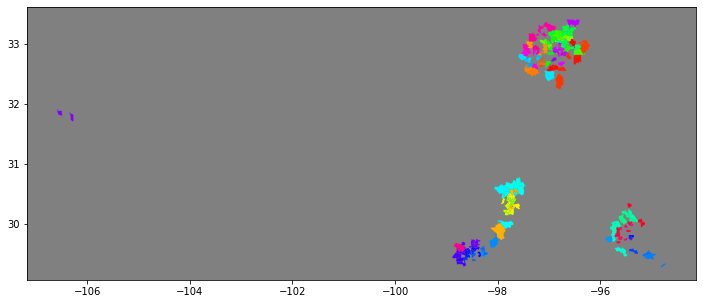

In [94]:
fig,ax = plt.subplots(figsize=(12,12))
zipz.plot(ax=ax, zorder=2, legend=False, cmap='hsv')
ax.set(facecolor = "gray")
ax.grid(False)

In [95]:
zipz

ZCTA5CE10  GEOID10 CLASSFP10 MTFCC10 FUNCSTAT10    ALAND10  AWATER10  \
178       75098    75098        B5   G6350          S   85315034  20354151   
182       75104    75104        B5   G6350          S  101138796    643670   
187       75115    75115        B5   G6350          S   56804463     85455   
193       75126    75126        B5   G6350          S  200283683   2403126   
424       75137    75137        B5   G6350          S   15759272     15921   
...         ...      ...       ...     ...        ...        ...       ...   
29251     77095    77095        B5   G6350          S   39900368    304501   
29591     77098    77098        B5   G6350          S    4598101       163   
29594     77301    77301        B5   G6350          S   48958069    111171   
29610     77339    77339        B5   G6350          S   44111803   2483285   
29614     77346    77346        B5   G6350          S   44996293   7307880   

        INTPTLAT10    INTPTLON10  \
178    +33.0121346  -096.5349358   
182    +32.5848142  -096.9723118   
187    +32.5994271  -096.8640746   
193    +32.7426013  -096.4528828   
424    +32.6432116  -096.9164680   
...            ...           ...   
29251  +29.9095128  -095.6514758   
29591  +29.7348128  -095.4160984   
29594  +30.3109315  -095.4385475   
29610  +30.0467773  -095.2210224   
29614  +29.9944992  -095.1774988   

                                                geometry  
178    POLYGON ((-96.60198 33.01127, -96.60061 33.011...  
182    POLYGON ((-97.06551 32.54908, -97.06427 32.549...  
187    POLYGON ((-96.90840 32.61879, -96.90560 32.618...  
193    POLYGON ((-96.52132 32.66287, -96.52127 32.667...  
424    POLYGON ((-96.94330 32.63208, -96.94329 32.632...  
...                                                  ...  
29251  POLYGON ((-95.68637 29.92585, -95.68633 29.926...  
29591  POLYGON ((-95.43023 29.73378, -95.42927 29.733...  
29594  POLYGON ((-95.47711 30.33277, -95.47698 30.333...  
29610  POLYGON ((-95.27132 30.04244, -95.27124 30.042...  
29614  POLYGON ((-95.21748 29.99958, -95.21273 29.999...  

[214 rows x 10 columns]

In [96]:
zri_map = zri[['RegionName', '2021-07']]
zri_map.head()

RegionName  2021-07
0       10025   2894.0
1       60657   1584.0
2       10023   2869.0
3       77494   1462.0
4       60614   1928.0

In [97]:
zipz = zipz.merge(zri_map, how='inner', left_on='GEOID10', right_on='RegionName').rename(columns={'2021-07':'zri'})

In [98]:
houston_zip = list(city_zip[city_zip['metro']=='houston']['zip'])
dfw_zip = list(city_zip[city_zip['metro']=='dfw']['zip'])
austin_zip = list(city_zip[city_zip['metro']=='austin']['zip'])
san_antonio_zip = list(city_zip[city_zip['metro']=='san_antonio']['zip'])
el_paso_zip = list(city_zip[city_zip['metro']=='el_paso']['zip'])

In [99]:
map_zip_houston = zipz[zipz['GEOID10'].isin(houston_zip)]
map_zip_dfw = zipz[zipz['GEOID10'].isin(dfw_zip)]
map_zip_austin = zipz[zipz['GEOID10'].isin(austin_zip)]
map_zip_san_antonio = zipz[zipz['GEOID10'].isin(san_antonio_zip)]
map_zip_el_paso = zipz[zipz['GEOID10'].isin(el_paso_zip)]


In [100]:
map_zip_houston

ZCTA5CE10  GEOID10 CLASSFP10 MTFCC10 FUNCSTAT10    ALAND10  AWATER10  \
90      77373    77373        B5   G6350          S   61501395    901064   
91      77375    77375        B5   G6350          S   88835562    718314   
92      77379    77379        B5   G6350          S   65936169    762022   
93      77380    77380        B5   G6350          S   32152702    610135   
94      77381    77381        B5   G6350          S   33737794    417452   
95      77382    77382        B5   G6350          S   29306435    191337   
96      77385    77385        B5   G6350          S   56971030    732724   
97      77386    77386        B5   G6350          S  104855139   1319203   
98      77429    77429        B5   G6350          S   99211290   1009260   
99      77433    77433        B5   G6350          S  151301387   2202112   
100     77449    77449        B5   G6350          S   77380681    337109   
101     77450    77450        B5   G6350          S   52956513   1024185   
102     77459    77459        B5   G6350          S   84818277   4226204   
103     77479    77479        B5   G6350          S   85318403   4450832   
123     77494    77494        B5   G6350          S  105829530    587448   
126     77539    77539        B5   G6350          S  130473952   7973868   
127     77550    77550        B5   G6350          S   19443638   2903928   
128     77573    77573        B5   G6350          S   78068263   3478998   
134     77584    77584        B5   G6350          S   83121310    170931   
135     77006    77006        B5   G6350          S    5840832         0   
136     77007    77007        B5   G6350          S   20225553    233914   
146     77008    77008        B5   G6350          S   16919179     70549   
147     77009    77009        B5   G6350          S   16014806     20223   
148     77019    77019        B5   G6350          S    9115665    104820   
198     77057    77057        B5   G6350          S   11016333      8379   
199     77063    77063        B5   G6350          S   11866312      9267   
200     77065    77065        B5   G6350          S   21264041     46256   
201     77066    77066        B5   G6350          S   22310414     35646   
202     77073    77073        B5   G6350          S   35868875    161698   
203     77077    77077        B5   G6350          S   22650412    191900   
204     77079    77079        B5   G6350          S   19115420    144292   
205     77083    77083        B5   G6350          S   26725422     65268   
206     77084    77084        B5   G6350          S   79400310    301475   
207     77088    77088        B5   G6350          S   28973991    162734   
208     77090    77090        B5   G6350          S   21295951    136317   
209     77095    77095        B5   G6350          S   39900368    304501   
210     77098    77098        B5   G6350          S    4598101       163   
211     77301    77301        B5   G6350          S   48958069    111171   
212     77339    77339        B5   G6350          S   44111803   2483285   
213     77346    77346        B5   G6350          S   44996293   7307880   

      INTPTLAT10    INTPTLON10  \
90   +30.0621687  -095.3839657   
91   +30.0946655  -095.5861868   
92   +30.0394566  -095.5343829   
93   +30.1369719  -095.4683604   
94   +30.1782483  -095.5009601   
95   +30.1949781  -095.5476902   
96   +30.1866824  -095.4290054   
97   +30.1002620  -095.3564881   
98   +29.9957583  -095.6650878   
99   +29.9328463  -095.7462284   
100  +29.8376112  -095.7337397   
101  +29.7435650  -095.7407166   
102  +29.5264013  -095.5309357   
103  +29.5669964  -095.6360160   
123  +29.7439478  -095.8305022   
126  +29.4521895  -095.0284698   
127  +29.3105350  -094.7757680   
128  +29.5037848  -095.0873004   
134  +29.5450414  -095.3506921   
135  +29.7409697  -095.3913012   
136  +29.7715454  -095.4110828   
146  +29.7982489  -095.4169332   
147  +29.7953437  -095.3675896   
148  +29.7541497  -095.4094982   
198  +29.7440813  -095.4879742   
199

In [ ]:
#map_zip_houston.GEOID10 = map_zip_houston.GEOID10.astype(str) 

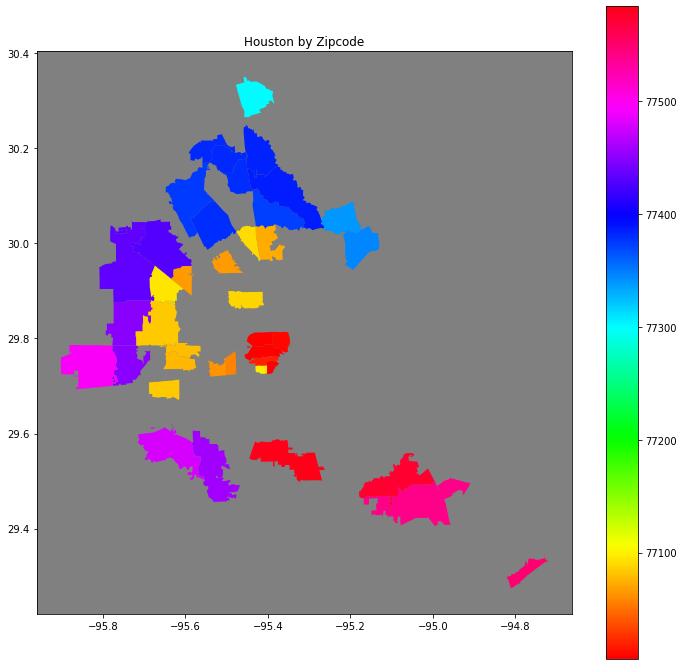

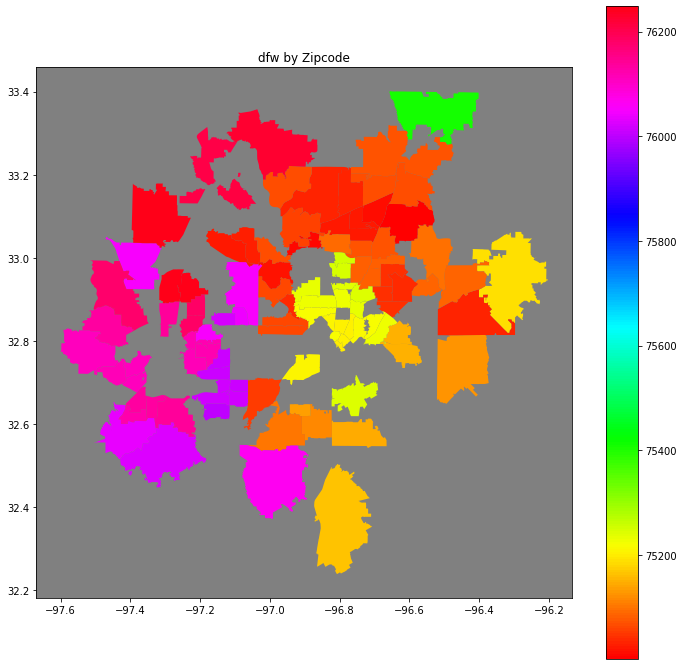

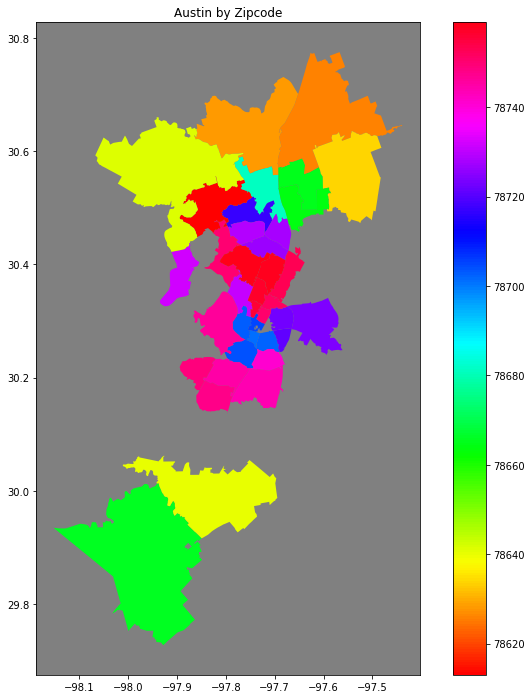

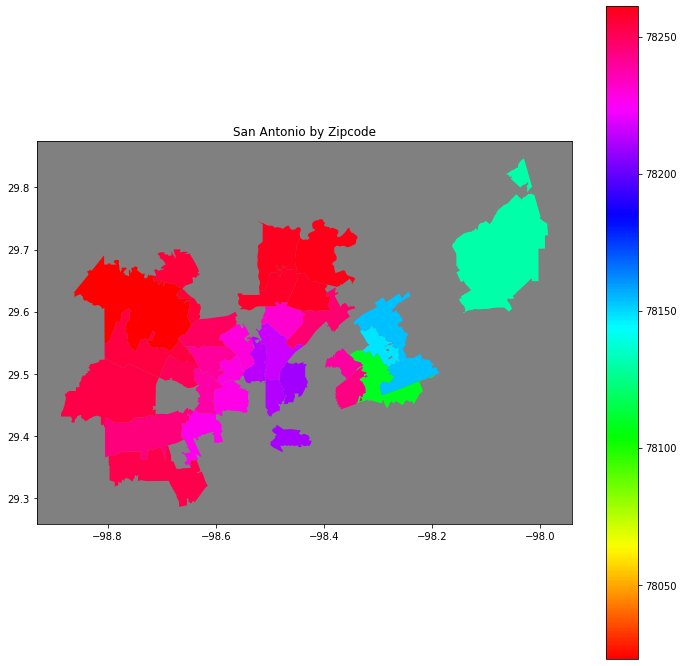

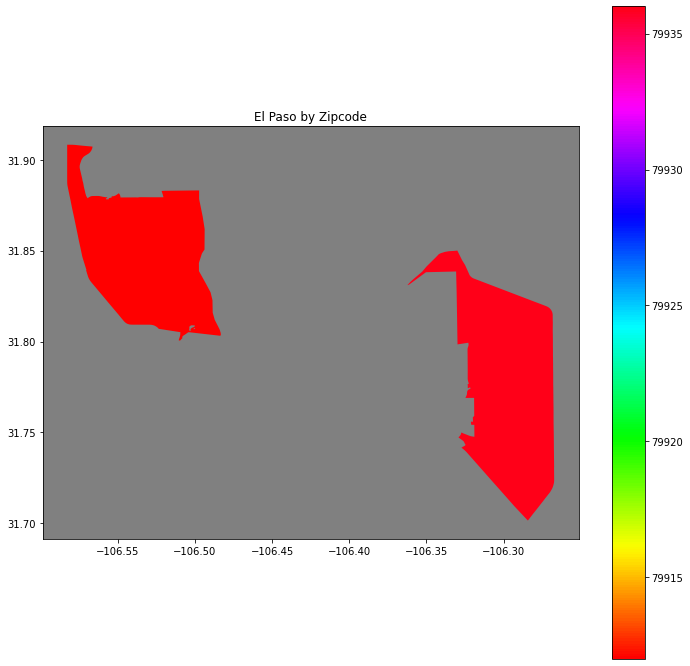

In [101]:
# coloring by zipcode alone
fig,ax = plt.subplots(figsize=(12,12))
map_zip_houston.plot(ax=ax, zorder=2, column='GEOID10', legend=True, cmap='hsv')
plt.title('Houston by Zipcode')
ax.set(facecolor = "gray")
ax.grid(False)

fig,ax = plt.subplots(figsize=(12,12))
map_zip_dfw.plot(ax=ax, zorder=2, column='GEOID10', legend=True, cmap='hsv')
plt.title('dfw by Zipcode')
ax.set(facecolor = "gray")
ax.grid(False)

fig,ax = plt.subplots(figsize=(12,12))
map_zip_austin.plot(ax=ax, zorder=2, column='GEOID10', legend=True, cmap='hsv')
plt.title('Austin by Zipcode')
ax.set(facecolor = "gray")
ax.grid(False)

fig,ax = plt.subplots(figsize=(12,12))
map_zip_san_antonio.plot(ax=ax, zorder=2, column='GEOID10', legend=True, cmap='hsv')
plt.title('San Antonio by Zipcode')
ax.set(facecolor = "gray")
ax.grid(False)

fig,ax = plt.subplots(figsize=(12,12))
map_zip_el_paso.plot(ax=ax, zorder=2, column='GEOID10', legend=True, cmap='hsv')
plt.title('El Paso by Zipcode')
ax.set(facecolor = "gray")
ax.grid(False)


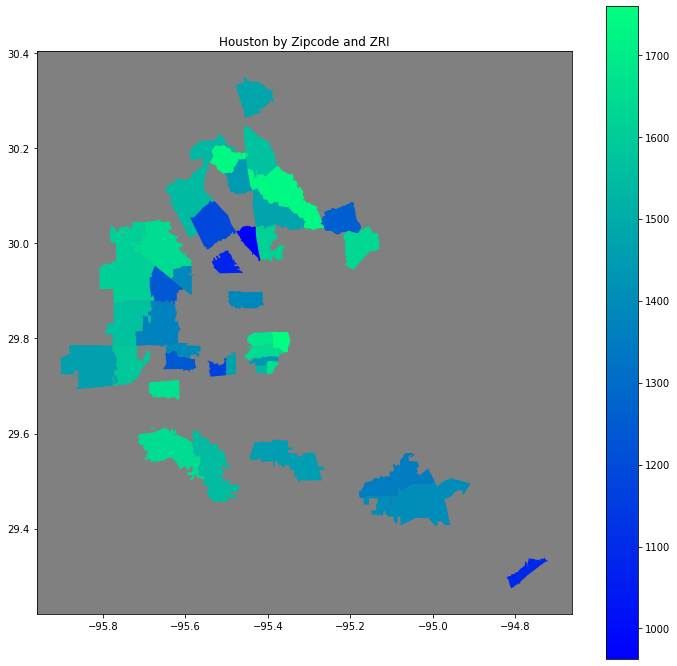

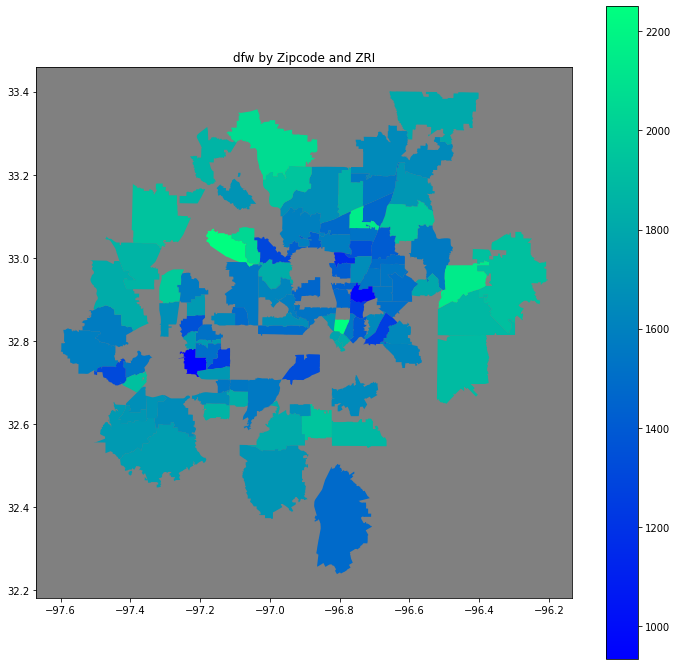

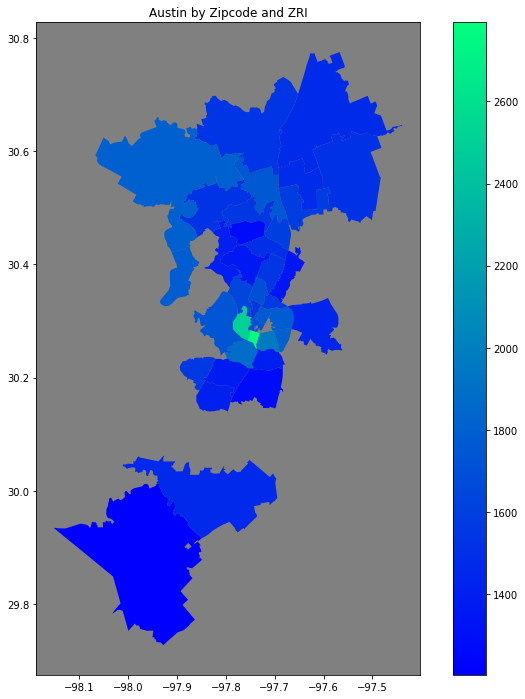

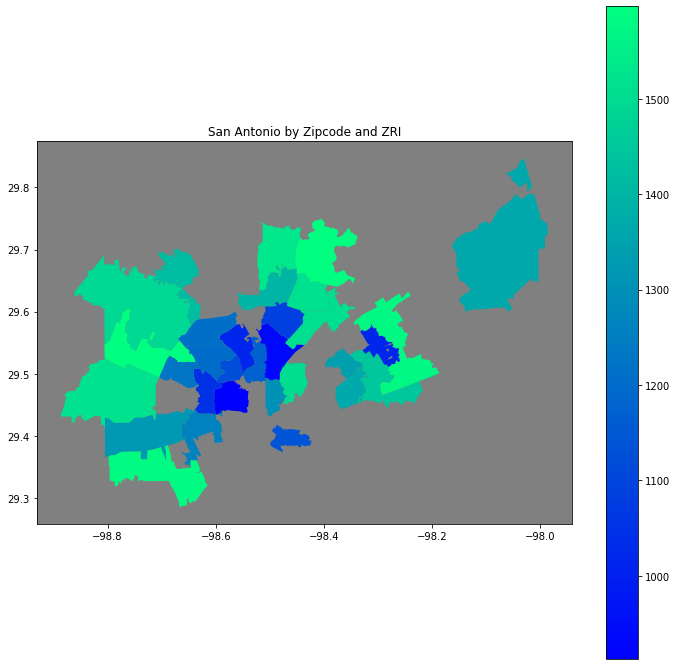

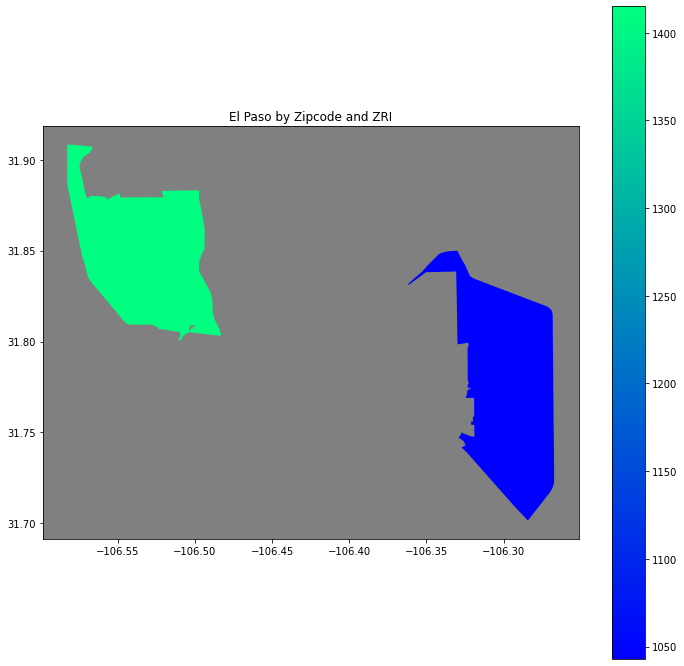

In [107]:
# coloring by zipcode and zri 
fig,ax = plt.subplots(figsize=(12,12))
map_zip_houston.plot(ax=ax, zorder=2, column='zri', legend=True, cmap='winter')
plt.title('Houston by Zipcode and ZRI')
ax.set(facecolor = "gray")
ax.grid(False)

fig,ax = plt.subplots(figsize=(12,12))
map_zip_dfw.plot(ax=ax, zorder=2, column='zri', legend=True, cmap='winter')
plt.title('dfw by Zipcode and ZRI')
ax.set(facecolor = "gray")
ax.grid(False)

fig,ax = plt.subplots(figsize=(12,12))
map_zip_austin.plot(ax=ax, zorder=2, column='zri', legend=True, cmap='winter')
plt.title('Austin by Zipcode and ZRI')
ax.set(facecolor = "gray")
ax.grid(False)

fig,ax = plt.subplots(figsize=(12,12))
map_zip_san_antonio.plot(ax=ax, zorder=2, column='zri', legend=True, cmap='winter')
plt.title('San Antonio by Zipcode and ZRI')
ax.set(facecolor = "gray")
ax.grid(False)

fig,ax = plt.subplots(figsize=(12,12))
map_zip_el_paso.plot(ax=ax, zorder=2, column='zri', legend=True, cmap='winter')
plt.title('El Paso by Zipcode and ZRI')
ax.set(facecolor = "gray")
ax.grid(False)


In [137]:
# https://gis-txdot.opendata.arcgis.com/datasets/txdot-roadway-inventory-onsystem/explore?location=32.882691%2C-96.650279%2C8.93
    
tx_roadways = gpd.read_file('/Users/trevorban/Downloads/texas_shapefile/TxDOT_Roadway_Inventory_OnSystem/TxDOT_Roadway_Inventory_OnSystem.shp')


In [138]:
tx_roadways = tx_roadways.dropna(axis=1,how='any')

In [145]:
test = tx_roadways[['RDWAY_MAIN', 'HWY_STAT', 'TOLL_LANE_', 'HWY_DES1', 'NUM_LANES', 'LANE_WIDTH', 'geometry']]

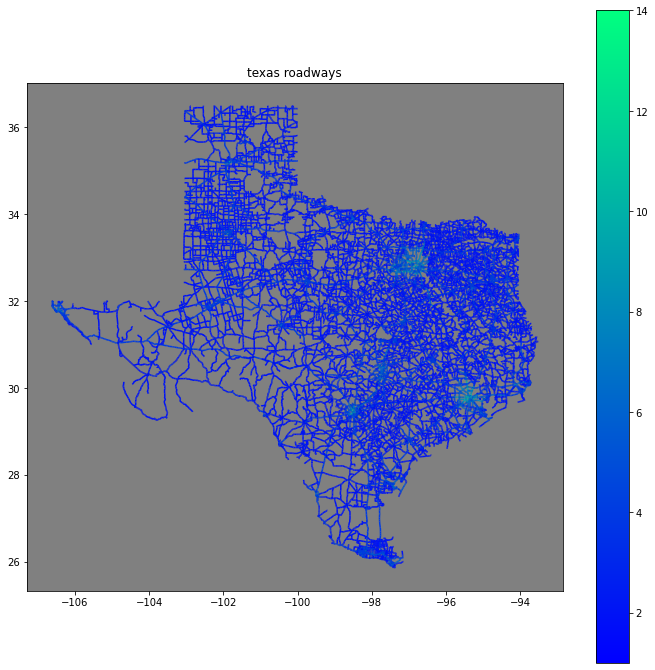

In [148]:
fig,ax = plt.subplots(figsize=(12,12))
test.plot(ax=ax, zorder=2, legend=True, column='NUM_LANES', cmap='winter')
plt.title('texas roadways')
ax.set(facecolor = "gray")
ax.grid(False)

In [208]:
def road_limit(df, xmin, xmax, ymin, ymax):
    df['x'] = df['geometry'].centroid.x
    df['y'] = df['geometry'].centroid.y
    df = df[df['x'] > xmin]
    df = df[df['x'] < xmax]
    df = df[df['y'] > ymin]
    df = df[df['y'] < ymax]
    return df

    

In [222]:
dfw_roads = road_limit(test, -97.6, -96.2, 32.2, 33.4 )

/Users/trevorban/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  
/Users/trevorban/opt/anaconda3/lib/python3.7/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
/Users/trevorban/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the 

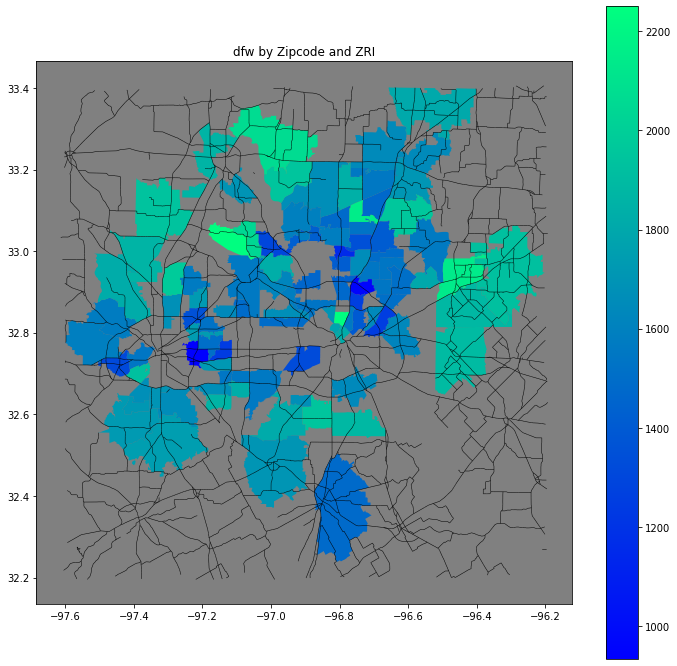

In [228]:
fig,ax = plt.subplots(figsize=(12,12))
map_zip_dfw.plot(ax=ax, zorder=1, column='zri', legend=True, cmap='winter')
dfw_roads.plot(ax=ax, zorder=2, legend=True, color='black', linewidth=0.5)
plt.title('dfw by Zipcode and ZRI')
ax.set(facecolor = "grey")
ax.grid(False)

In [249]:
austin_roads = road_limit(highway_sf, -98.2, -97.4, 29.7, 30.8 )

/Users/trevorban/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  
/Users/trevorban/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


In [250]:
austin_roads

TYPE                       NAME ONEWAY  \
538560    secondary            Ranch Road 2325   None   
540362  residential           Old Spicewood Rd   None   
543242        trunk  United States Highway 290   None   
544286    secondary                   F-M 1431   None   
547680  residential               Longhorn Trl   None   
...             ...                        ...    ...   
762664  residential            E Rio Grande St   None   
762680  residential                  Timber Ct   None   
762681  residential                Circle Bend   None   
762684      service                       None   None   
762690  residential                       None   None   

                                                 geometry          x  \
538560  LINESTRING (-98.10129 29.99948, -98.10154 29.9... -98.182629   
540362  LINESTRING (-98.25030 30.38671, -98.24918 30.3... -98.198310   
543242  LINESTRING (-98.08750 30.19157, -98.08863 30.1... -98.161226   
544286  LINESTRING (-98.23266 30.57691, -98.23220 30.5... -98.158635   
547680  LINESTRING (-98.17125 30.08209, -98.17133 30.0... -98.193447   
...                                                   ...        ...   
762664  LINESTRING (-97.39977 30.56486, -97.39996 30.5... -97.400111   
762680  LINESTRING (-97.40024 30.11805, -97.40024 30.1... -97.400049   
762681  LINESTRING (-97.40024 30.55273, -97.39988 30.5... -97.400064   
762684  LINESTRING (-97.40002 30.27783, -97.40009 30.2... -97.400116   
762690  LINESTRING (-97.39996 30.16531, -97.40006 30.1... -97.400083   

                y  
538560  30.046893  
540362  30.395441  
543242  30.198910  
544286  30.569293  
547680  30.087661  
...           ...  
762664  30.565018  
762680  30.118836  
762681  30.552790  
762684  30.277545  
762690  30.165006  

[42436 rows x 6 columns]

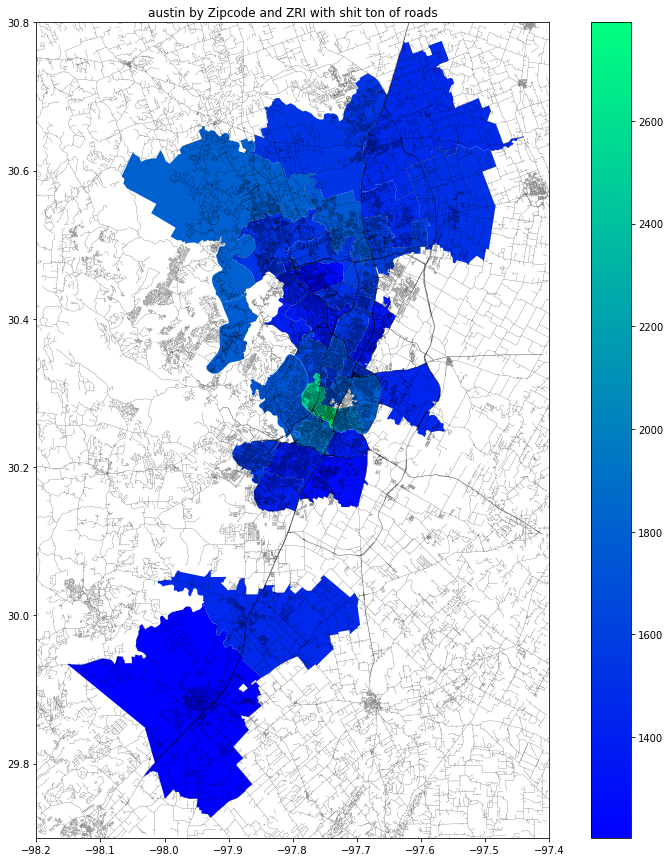

In [256]:
fig,ax = plt.subplots(figsize=(15,15))
map_zip_austin.plot(ax=ax, zorder=1, column='zri', legend=True, cmap='winter')
austin_roads.plot(ax=ax, zorder=2, legend=True, color='black', linewidth=0.3, alpha=0.6)
plt.title('austin by Zipcode and ZRI with shit ton of roads')
plt.ylim(29.7, 30.8)
plt.xlim(-98.2, -97.4)
ax.set(facecolor = "white")
ax.grid(False)

In [258]:
dfw_roads = road_limit(highway_sf, -97.6, -96.2, 32.2, 33.4)

/Users/trevorban/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  
/Users/trevorban/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


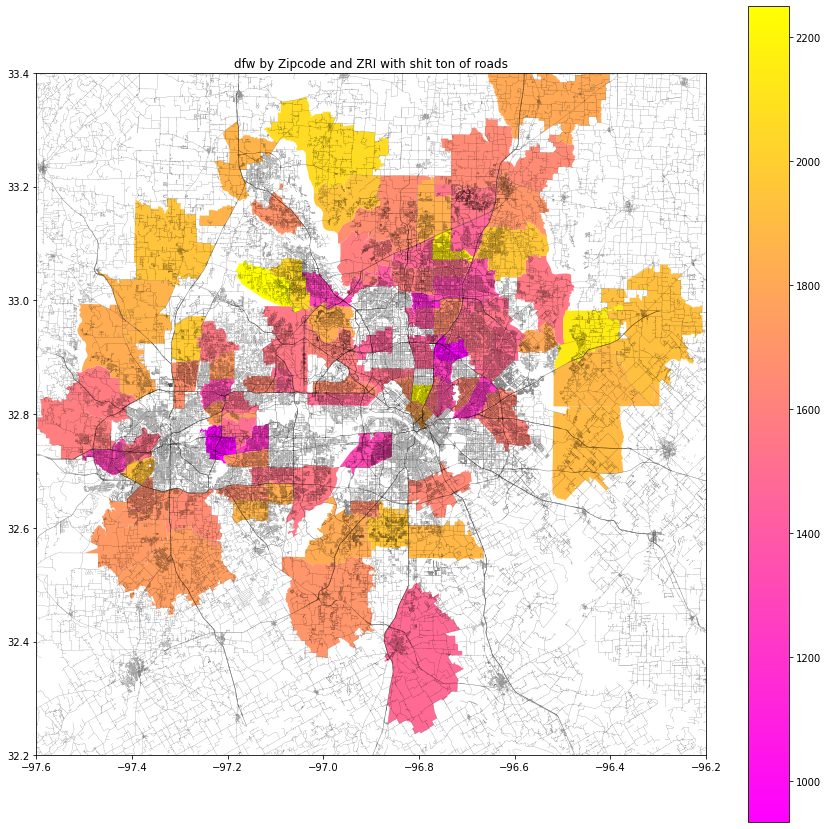

In [264]:
fig,ax = plt.subplots(figsize=(15,15))
map_zip_dfw.plot(ax=ax, zorder=1, column='zri', legend=True, cmap='spring')
dfw_roads.plot(ax=ax, zorder=2, legend=True, color='black', linewidth=0.2, alpha=0.6)
plt.title('dfw by Zipcode and ZRI with shit ton of roads')
plt.ylim(32.2, 33.4)
plt.xlim(-97.6, -96.2)
ax.set(facecolor = "white")
ax.grid(False)

In [280]:
dfw_roads.TYPE.unique()

array(['trunk', 'residential', 'unclassified', 'secondary', 'primary',
       'service', 'tertiary', 'motorway_link', 'track', 'trunk_link',
       'motorway', 'primary_link', 'secondary_link', 'construction',
       'Hike/Bike Path', 'path', 'footway', 'cycleway',
       '820 Entrance Ramp', 'pedestrian', 'ford; footway', 'mo',
       'residential; secondary', 'fac', 'unclassified; residential',
       'primary; residential', 'road'], dtype=object)

[None]

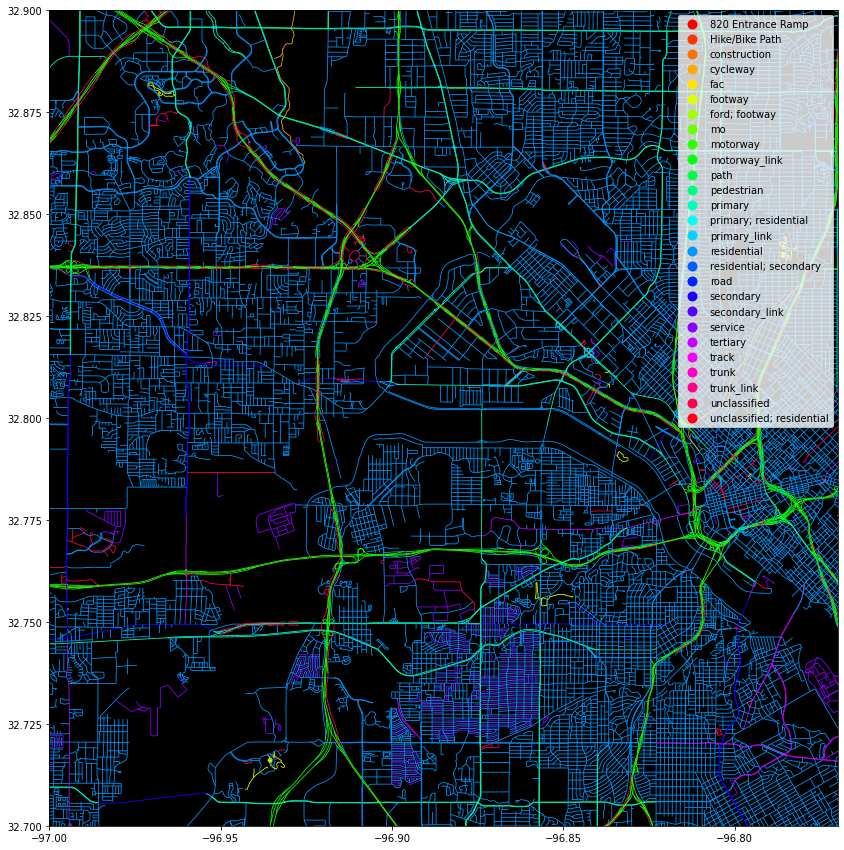

In [299]:
fig,ax = plt.subplots(figsize=(15,15))
dfw_roads.plot(ax=ax, zorder=2, legend = True, column='TYPE', linewidth=0.8, cmap='hsv')
plt.ylim(32.7, 32.9)
plt.xlim(-97.0, -96.77)
ax.set(facecolor = "black")
